In [4]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [5]:
def plot(data, name=None):
    %matplotlib inline
    hist = plt.hist(data, density=True)
    if name:
        plt.savefig('./plots/' + name + 'Hist.png', bbox_inches='tight')
    plt.show()
    
    plt.plot(data)
    if name:
        plt.savefig('./plots/' + name + 'Plot.png', bbox_inches='tight')
    plt.show()


In [6]:
sig = np.loadtxt(open('sig.csv'), delimiter=',')

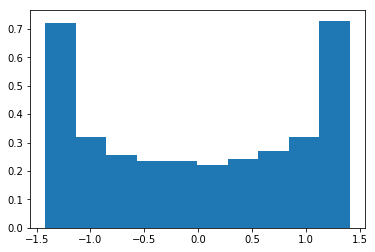

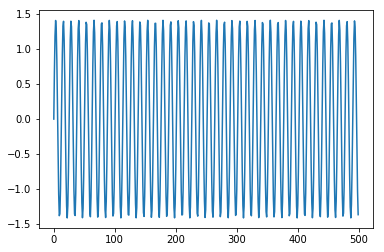

In [7]:
plot(sig[0])

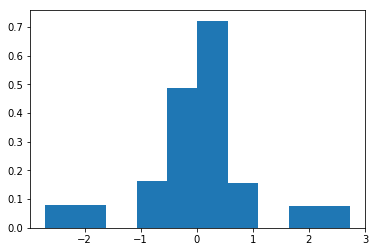

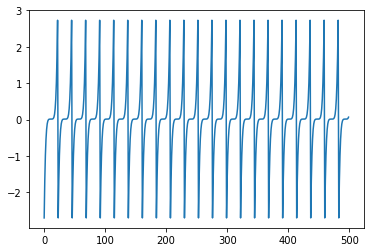

In [8]:
plot(sig[1])

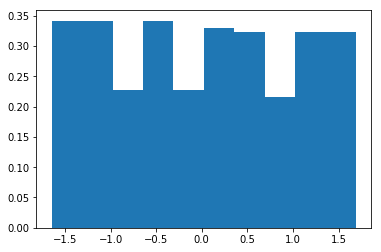

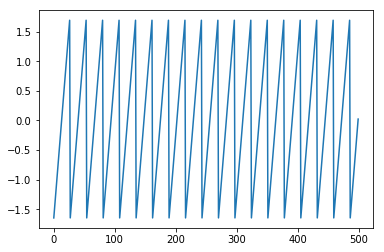

In [9]:
plot(sig[2])

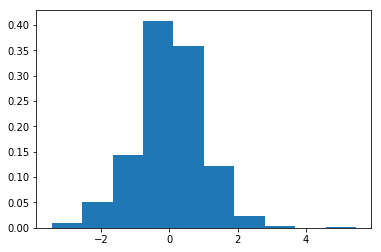

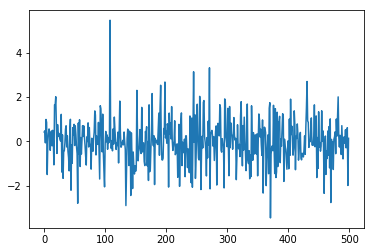

In [10]:
plot(sig[3])

In [11]:
mixedsig = np.loadtxt(open('mixedsig.csv'), delimiter=',')

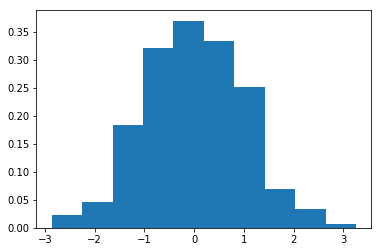

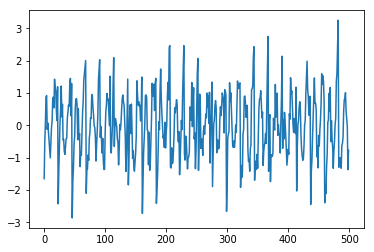

In [12]:
plot(mixedsig[0])

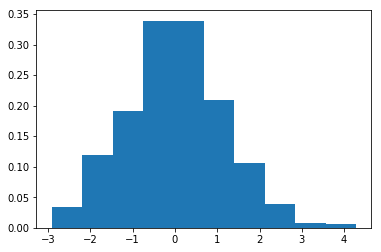

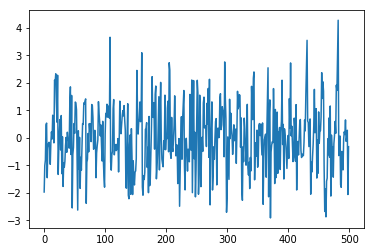

In [13]:
plot(mixedsig[1])

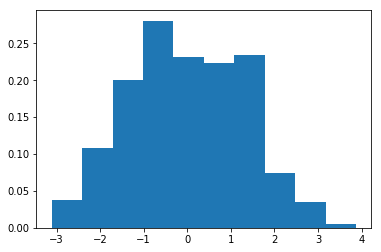

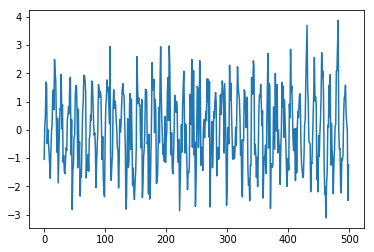

In [14]:
plot(mixedsig[2])

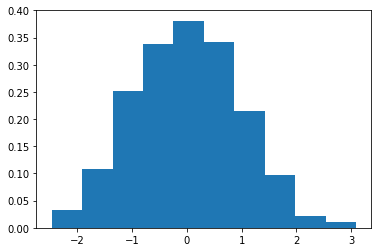

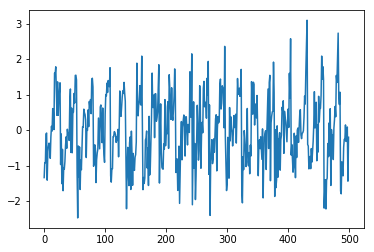

In [15]:
plot(mixedsig[3])

Take mean from X (by row)

In [16]:
Dim = len(mixedsig)
m = np.mean(mixedsig, 1)
m = m.reshape((Dim, 1))

In [17]:
m #gives different results, try with imported mixedsig in matlab

array([[  4.51200000e-07],
       [ -3.12600000e-07],
       [  1.29200000e-07],
       [ -8.72800000e-07]])

In [18]:
mixedmean = mixedsig.copy() - m

In [19]:
mixedmean

array([[-1.65080045, -0.52869045,  0.04726755, ..., -0.04502045,
        -1.37080045, -0.77214045],
       [-1.97279969, -1.01079969, -0.81336969, ...,  0.27543031,
        -2.06399969, -0.32188969],
       [-1.04360013,  0.09323787,  0.49661987, ..., -0.02332013,
        -2.49590013, -1.23770013],
       [-1.33749913, -0.91578913, -0.91911913, ...,  0.08710387,
        -1.43739913, -0.20267913]])

In [20]:
mixedsig

array([[-1.6508  , -0.52869 ,  0.047268, ..., -0.04502 , -1.3708  ,
        -0.77214 ],
       [-1.9728  , -1.0108  , -0.81337 , ...,  0.27543 , -2.064   ,
        -0.32189 ],
       [-1.0436  ,  0.093238,  0.49662 , ..., -0.02332 , -2.4959  , -1.2377  ],
       [-1.3375  , -0.91579 , -0.91912 , ...,  0.087103, -1.4374  ,
        -0.20268 ]])

In [21]:
Dim, NumOfSampl = np.shape(mixedsig)

In [22]:
firstEig = 0
lastEig = Dim-1

PCA

In [23]:
OldDim = len(mixedsig) #Dim !IMPORTANT mixedsig rather than mixedmean

In [24]:
COV = np.cov(mixedsig)

In [25]:
COV

array([[ 0.98169399,  0.95721444,  1.18819942,  0.47868123],
       [ 0.95721444,  1.38114587,  1.31839041,  0.96079563],
       [ 1.18819942,  1.31839041,  1.76627613,  0.86085405],
       [ 0.47868123,  0.96079563,  0.86085405,  0.93284727]])

In [26]:
D, E = np.linalg.eig(COV) #Each value of D corresponds to a column of E, in MATLAB sometimes they are ordered, here they are not 

In [27]:
D

array([ 4.29271311,  0.56924631,  0.03320751,  0.16679632])

In [28]:
E

array([[ 0.4318555 ,  0.49344742, -0.62734283, -0.42006124],
       [ 0.54378721, -0.28554592,  0.53695976, -0.57830201],
       [ 0.61446822,  0.35687304,  0.2681118 ,  0.65052786],
       [ 0.37446643, -0.74001   , -0.49621694,  0.25676612]])

In [29]:
rankTolerance = 1e-7
maxLastEig = np.sum(D > rankTolerance)-1

In [30]:
maxLastEig

3

In [31]:
eigenvalues = np.sort(D)[::-1]

In [32]:
eigenvalues

array([ 4.29271311,  0.56924631,  0.16679632,  0.03320751])

In [33]:
if lastEig > maxLastEig:
    lastEig = maxLastEig

In [34]:
if lastEig < Dim-1:
    lowerLimitValue = (eigenvalues[lastEig] + eigenvalues[lastEig + 1]) / 2
else:
    lowerLimitValue = eigenvalues[OldDim-1] - 1 #It isn't inclusive

lowerColumns = D > lowerLimitValue

In [35]:
if firstEig > 0:
    higherLimitValue = (eigenvalues[firstEig - 1] + eigenvalues[firstEig]) / 2
else:
    higherLimitValue = eigenvalues[0] + 1 #It isn't inclusive

higherColumns = D < higherLimitValue

In [36]:
selectedColumns = lowerColumns & higherColumns

In [37]:
E = E[:, selectedColumns]
D = np.diag(D[selectedColumns]) #does it matter if it's ordered or not !IMPORTANT

In [38]:
E

array([[ 0.4318555 ,  0.49344742, -0.62734283, -0.42006124],
       [ 0.54378721, -0.28554592,  0.53695976, -0.57830201],
       [ 0.61446822,  0.35687304,  0.2681118 ,  0.65052786],
       [ 0.37446643, -0.74001   , -0.49621694,  0.25676612]])

In [39]:
D

array([[ 4.29271311,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.56924631,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.03320751,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.16679632]])

Whitening

In [40]:
#If any value in D < 0 we raise an error

whiteningMatrix = np.linalg.inv(np.sqrt(D)) @ E.T #Order and some signs are different

In [41]:
whiteningMatrix

array([[ 0.2084359 ,  0.26245996,  0.29657429,  0.18073695],
       [ 0.65401961, -0.37846511,  0.4730027 , -0.98081586],
       [-3.44260157,  2.94661613,  1.47128822, -2.72303614],
       [-1.0285357 , -1.41599417,  1.59284189,  0.62870148]])

In [42]:
dewhiteningMatrix = E @ np.sqrt(D)

In [43]:
dewhiteningMatrix #dewhitening @ whitening = I

array([[ 0.89475551,  0.37229825, -0.11432024, -0.17155597],
       [ 1.12666531, -0.21543986,  0.09784979, -0.23618262],
       [ 1.27310833,  0.26925504,  0.04885782,  0.26568017],
       [ 0.77585188, -0.55832581, -0.09042526,  0.1048651 ]])

In [44]:
#If Whitesig has imaginary values raise an exception

Whitesig = whiteningMatrix @ mixedsig #Differs in sign with MATLAB

In [45]:
Whitesig

array([[-1.41310759, -0.5133576 , -0.22245893, ...,  0.07173218,
        -1.82745234, -0.64912669],
       [ 0.48519598,  0.97910208,  1.47513644, ..., -0.23014703,
         0.11387916, -0.76981426],
       [ 1.97658683,  1.47253868,  0.67405408, ...,  0.69507734,
        -1.12079357,  0.44057565],
       [ 1.98820201,  1.54781831,  1.31629539, ..., -0.32608589,
        -0.54674087, -0.8489177 ]])

In [46]:
#If we have removed some eigenvalue columns then our Dim value ought to have changed
#If Whitesig has imaginary values raise an exception

Dim = len(Whitesig)

Symmetric ICA

In [47]:
A = np.zeros((Dim, Dim)) #maybe dtype
B = linalg.orth(np.random.random((Dim, Dim))) #Dim is NumOfIC

In [48]:
B

array([[ 0.53249329, -0.62852063, -0.55398086,  0.12049032],
       [ 0.23696865, -0.53211132,  0.78888348, -0.19587307],
       [ 0.48715677,  0.32669926,  0.26412646,  0.76562594],
       [ 0.65036531,  0.46377468, -0.03170611, -0.60077678]])

In [49]:
Bold = np.zeros((Dim, Dim))

In [50]:
maxNumIterations = 10

In [51]:
B = B @ np.real( np.linalg.inv(linalg.sqrtm(B.T @ B)) )

In [52]:
B

array([[ 0.53249329, -0.62852063, -0.55398086,  0.12049032],
       [ 0.23696865, -0.53211132,  0.78888348, -0.19587307],
       [ 0.48715677,  0.32669926,  0.26412646,  0.76562594],
       [ 0.65036531,  0.46377468, -0.03170611, -0.60077678]])

In [53]:
W = B.T @ whiteningMatrix

In [54]:
W

array([[-2.08003774,  0.56462431,  2.02268775, -1.05384124],
       [-2.08072171,  0.34237914,  0.78129536, -0.18973176],
       [-0.47619552,  0.37921228,  0.54695087, -1.61303381],
       [-2.12081504,  3.21245718,  0.11259986, -2.2486439 ]])

In [55]:
A = dewhiteningMatrix @ B

In [56]:
A

array([[ 0.39740839, -0.87738807, -0.22673311,  0.05042648],
       [ 0.44295243, -0.67106247, -0.76077481,  0.39476051],
       [ 0.93831723, -0.80427096, -0.48838583, -0.02155024],
       [ 0.30497956, -0.17145553, -0.89746966,  0.0706112 ]])

In [57]:
B = B @ np.real( np.linalg.inv(linalg.sqrtm(B.T @ B)) ) #Find where this is used

In [58]:
B

array([[ 0.53249329, -0.62852063, -0.55398086,  0.12049032],
       [ 0.23696865, -0.53211132,  0.78888348, -0.19587307],
       [ 0.48715677,  0.32669926,  0.26412646,  0.76562594],
       [ 0.65036531,  0.46377468, -0.03170611, -0.60077678]])

In [59]:
minAbsCos = min(np.abs( np.diag(B.T @ Bold) ) )

In [60]:
1 - minAbsCos

1.0

In [61]:
Bold = B

In [62]:
Bold

array([[ 0.53249329, -0.62852063, -0.55398086,  0.12049032],
       [ 0.23696865, -0.53211132,  0.78888348, -0.19587307],
       [ 0.48715677,  0.32669926,  0.26412646,  0.76562594],
       [ 0.65036531,  0.46377468, -0.03170611, -0.60077678]])

In [63]:
hypTan = np.tanh(Whitesig.T @ B)

In [64]:
hypTan

array([[ 0.92440212,  0.97563825,  0.92529279,  0.0535068 ],
       [ 0.93320608,  0.76183796,  0.88462514, -0.05605501],
       [ 0.88866608,  0.18345982,  0.89027489, -0.5302336 ],
       ..., 
       [ 0.10975207,  0.15204148, -0.02736338,  0.65373676],
       [-0.95152923,  0.43679892,  0.67697837, -0.64816955],
       [-0.69910852,  0.51377532, -0.10402871,  0.72584944]])

In [65]:
(Whitesig @ hypTan) / NumOfSampl

array([[ 0.33103844, -0.37216391, -0.33621899,  0.03417321],
       [ 0.16370474, -0.32818987,  0.51388786, -0.1209553 ],
       [ 0.25971134,  0.17029592,  0.19795429,  0.44091449],
       [ 0.4118891 ,  0.16847547, -0.02953922, -0.36049281]])

In [66]:
np.ones((Dim, 1)) #Dim but as a column

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [67]:
rowSum = np.sum(1 - hypTan**2, axis = 0)

In [68]:
rowSum

array([ 301.30704646,  333.1941701 ,  282.43645096,  313.22571582])

In [69]:
(np.ones((Dim, Dim)) * rowSum) * B / NumOfSampl #Dim is len of B

array([[ 0.32088796, -0.41883882, -0.31292877,  0.07548134],
       [ 0.14280065, -0.35459278,  0.4456189 , -0.12270497],
       [ 0.29356753,  0.21770858,  0.14919788,  0.47962747],
       [ 0.3919193 ,  0.30905404, -0.01790992, -0.37635747]])

In [70]:
W = B.T @ whiteningMatrix #Do this after maxIterations + 1 again

In [71]:
W

array([[-2.08003774,  0.56462431,  2.02268775, -1.05384124],
       [-2.08072171,  0.34237914,  0.78129536, -0.18973176],
       [-0.47619552,  0.37921228,  0.54695087, -1.61303381],
       [-2.12081504,  3.21245718,  0.11259986, -2.2486439 ]])

Test run

In [38]:
import numpy as np
from scipy import linalg

def euclid(x):
    sum = 0
    for i in x:
        sum += i**2
    return np.sqrt(sum)

def norm(X):
    l = len(np.shape(X))
    if l == 1:
        return euclid(X)

def PCA(data, firstEig=None, lastEig=None):
    if lastEig is None:
        lastEig = len(data) - 1
    if firstEig is None:
        firstEig = 0

    OldDim = len(data) #Amount of components

    COV = np.cov(data) # Dim x Dim
    D, E = np.linalg.eig(COV)

    rankTolerance = 1e-7
    maxLastEig = np.sum(D > rankTolerance)
    if maxLastEig == 0:
        raise Exception('Eigenvalues of the covariance matrix are all smaller than tolerance \
        Please make sure that your data matrix contains nonzero values. \
        \nIf the values are very small, try rescaling the data matrix.\n')

    maxLastEig = maxLastEig - 1 #for index
    eigenvalues = np.sort(D)[::-1]

    if lastEig > maxLastEig:
        lastEig = maxLastEig

    if lastEig < OldDim-1: #if lastEig essentially changes
        lowerLimitValue = (eigenvalues[lastEig] + eigenvalues[lastEig + 1]) / 2
    else:
        lowerLimitValue = eigenvalues[OldDim - 1] - 1 #It isn't inclusive

    lowerColumns = D > lowerLimitValue

    if firstEig > 0:
        higherLimitValue = (eigenvalues[firstEig - 1] + eigenvalues[firstEig]) / 2
    else:
        higherLimitValue = eigenvalues[0] + 1 #It isn't inclusive

    higherColumns = D < higherLimitValue

    selectedColumns = lowerColumns & higherColumns

    E = E[:, selectedColumns]
    D = np.diag(D[selectedColumns]) #Eigenvalues

    return E, D

def FastICASymm(X, whitening, dewhitening, maxIterations, threshold):
    Dim = len(X)
    NumOfSampl = len(X[0])

    B = linalg.orth(np.random.random((Dim, Dim)))
    Bold = np.zeros((Dim, Dim))
    #W
    A = np.zeros((Dim, Dim)) #maybe dtype

    #helpers
    sqrt = linalg.sqrtm  # sqrt on a matrix
    inv = np.linalg.inv
    
    for i in range(0, maxIterations + 1):
        if i == maxIterations + 1:
            print('Component {} did not converge after {} iterations'.format(i, maxIterations))
            if B.size != 0: #not empty

                B = B @ np.real(inv(sqrt(B.T @ B)))
                W = B.T @ whitening
                A = dewhitening @ B

                return A, W
        print(i)
        B = B @ np.real(inv(sqrt(B.T @ B))) #todo theory

        minAbsCos = min(abs(np.diag(B.T @ Bold)))
        if 1 - minAbsCos < threshold:
            A = dewhitening @ B
            W = B.T @ whitening
            return A, W

        Bold = B

        hypTan = np.tanh(X.T @ B)
        left = (X @ hypTan) / NumOfSampl
        rowSum = np.sum(1 - hypTan ** 2, axis=0)
        #####
        print(i)
        right = (np.ones((Dim, Dim)) * rowSum) * B / NumOfSampl
        B = left - right

#todo
def FastICADefl(X, whitening, dewhitening, maxIterations, threshold):
    Dim = len(X)
    NumOfSampl = len(X[0])
    
    if not np.isreal(X).all():
        raise Exception('X has imaginary values!')

    B = np.zeros((Dim, Dim)) #maybe dtype
    W = np.zeros((Dim, Dim)) #maybe dtype
    A = np.zeros((Dim, Dim)) #maybe dtype
    failureLimit = 5
    numOfFailures = 0
    
    for i in range(0, Dim):
        w = np.random.random(Dim)

        w = w - B @ B.T @ w #w is a column with Dim rows
        w = w/norm(w)

        wOld = np.zeros(Dim)

        for j in range(0, maxIterations + 1):
            w = w - B@B.T@w #w is a column with Dim rows todo
            w = w/norm(w)

            if j == maxIterations + 1:
                print('Component {} did not converge after {} iterations'.format(i, maxIterations))
                numOfFailures += 1
                if numOfFailures > failureLimit: #limit is set to 5
                    raise Exception('Exceeded number of convergence failures!')

            if norm(w - wOld) < threshold or norm(w + wOld) < threshold:
                numOfFailures = 0 #?
                B[:, i] = w
                A[:, i] = dewhitening @ w
                W[i, :] = w.T @ whitening
                break

            wOld = w

            hypTan = np.tanh(X.T @ w)
            left = (X @ hypTan) / NumOfSampl
            rowSum = np.sum(1 - hypTan ** 2, axis=0)
            #####
            right = rowSum * w / NumOfSampl
            w = left - right

            w = w/norm(w)

    return A, W

#Using g(y) = tanh(y)
def FastICA(mixedsig, approach='Symm', maxIterations=10, threshold=0.0001):
    Dim = len(mixedsig)

    #Center X
    m = np.mean(mixedsig, 1)
    m = m.reshape((Dim, 1))

    mixedmean = mixedsig.copy() - m

    #PCA and whitening
    #E - the eigenvectors, an orthogonal matrix, Dim x Dim-k
    #D - the eigenvalues
    E, D = PCA(mixedsig) #maybe check if D contains negative values
    #todo read theory about mixedmin

    WhiteningMatrix = np.linalg.inv(np.sqrt(D)) @ E.T
    DewhiteningMatrix = E @ np.sqrt(D)

    Whitesig = WhiteningMatrix @ mixedsig

    if not np.all(np.isreal(Whitesig)):
        raise Exception('Whitened matrix has imaginary values!') #should this be a warning
        
    #A - mixing matrix
    #W - demixing matrix
    if approach == 'Symm':
        A, W = FastICASymm(Whitesig, WhiteningMatrix, DewhiteningMatrix, maxIterations, threshold)
    else:
        A, W = FastICADefl(Whitesig, WhiteningMatrix, DewhiteningMatrix, maxIterations, threshold)

    return W@(mixedmean + m), A, W

In [49]:
I, A, W = FastICA(mixedsig, 'Symm', 1000, 0.000001)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
5.82 s ± 1.95 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


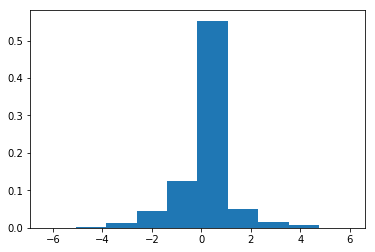

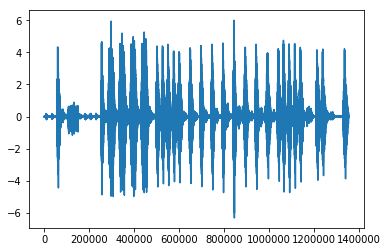

In [43]:
plot(I[0])

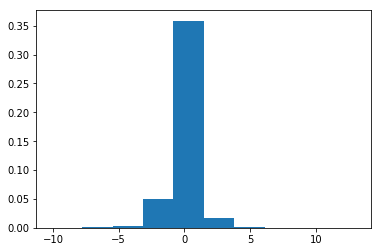

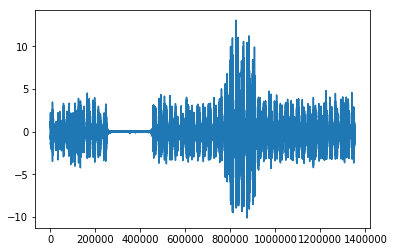

In [44]:
plot(I[1])

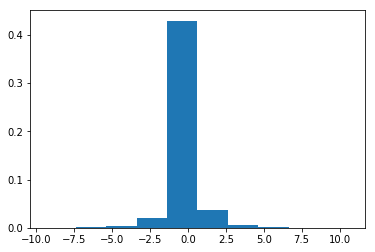

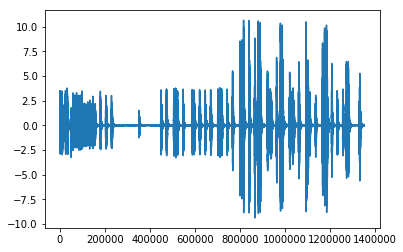

In [45]:
plot(I[2])

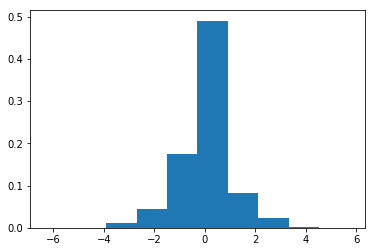

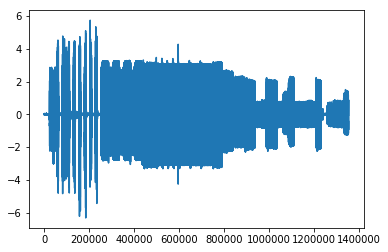

In [46]:
plot(I[3])

In [158]:
(np.ones((Dim, Dim)) * rowSum) * B / NumOfSampl

NameError: name 'rowSum' is not defined

In [39]:
from scipy.io.wavfile import read, write

rate, data = read('signals30.wav')
data = data.T.copy()
data = data.astype(np.float32)

In [41]:
mixedsig = A@data[:,:]

In [26]:
A = np.random.rand(11, 11)

In [50]:
mixedsig.shape

(4, 500)

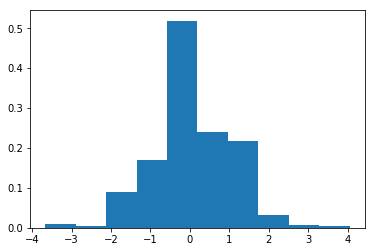

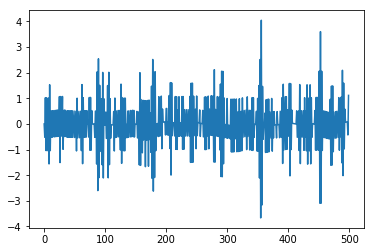

In [106]:
plot(I[5])

In [47]:
write('testCPU.wav', rate, I.T)

In [32]:
A = np.load('A.npy')